## Clone the repo and install requirements

In [ ]:
%%bash
git clone https://github.com/ultralytics/yolov5  # clone
# cd yolov5
# pip install -r requirements.txt  # install

Cloning into 'yolov5'...


In [ ]:
!pip install -r yolov5/requirements.txt  # install

In [ ]:
!pip install tf-nightly

## TFLite (.tflite), ONNX (.onnx), CoreML (.mlmodel), TensorFlow GraphDef (.pb)

LINK -: https://github.com/ultralytics/yolov5/issues/251


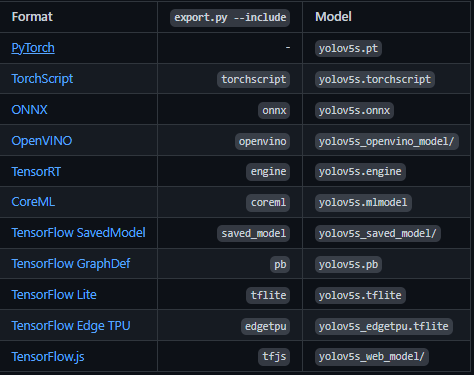

In [ ]:
!python /content/yolov5/export.py --weights yolov5s.pt --include onnx tflite coreml pb 

## TensorRT Export

In [ ]:
!pip install -U nvidia-tensorrt --index-url https://pypi.ngc.nvidia.com

In [ ]:
!python /content/yolov5/export.py --weights yolov5s.pt --include engine --imgsz 640 640 --device 0

## Detection on ONNX, CoreML, TFLite and TensorFlow GraphDef

In [ ]:
!python /content/yolov5/detect.py --weights yolov5s.onnx

In [ ]:
# Only supported for macOS. It won't work.
# !python /content/yolov5/detect.py --weights yolov5s.mlmodel

In [ ]:
!python /content/yolov5/detect.py --weights /content/yolov5s-fp16.tflite

detect: weights=['/content/yolov5s-fp16.tflite'], source=yolov5/data/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-237-gdc7e093 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Loading /content/yolov5s-fp16.tflite for TensorFlow Lite inference...
image 1/2 /content/yolov5/data/images/bus.jpg: 640x640 4 persons, 1 bus, Done. (0.415s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 640x640 2 persons, 1 tie, Done. (0.309s)
Speed: 3.7ms pre-process, 362.0ms inference, 7.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp


In [ ]:
!python /content/yolov5/detect.py --weights yolov5s.engine --imgsz 640 640 --device 0

detect: weights=['yolov5s.engine'], source=yolov5/data/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-237-gdc7e093 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Loading yolov5s.engine for TensorRT inference...
[02/05/2022-15:37:50] [TRT] [I] [MemUsageChange] Init CUDA: CPU +0, GPU +0, now: CPU 0, GPU 248 (MiB)
[02/05/2022-15:37:50] [TRT] [I] Loaded engine size: 36 MiB
[02/05/2022-15:37:51] [TRT] [I] [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +0, GPU +224, now: CPU 0, GPU 510 (MiB)
[02/05/2022-15:37:51] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +52, now: CPU 0, GPU 562 (MiB)
[02/05/2022-15:37:51] [TRT] [I] [MemU

## Validation on exported models

In [ ]:
!python /content/yolov5/val.py --weights yolov5s.pt   

val: data=yolov5/data/coco128.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.0-235-ge1a6a0b torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients

Dataset not found, missing paths: ['/content/datasets/coco128/images/train2017']
100% 6.66M/6.66M [00:00<00:00, 81.4MB/s]
Dataset autodownload success, saved to /content/datasets

val: Scanning '/content/datasets/coco128/labels/train2017' images and labels...128 found, 0 missing, 2 empty, 0 corrupt: 100% 128/128 [00:00<00:00, 1064.90it/s]
val: New cache created: /content/datasets/coco128/labels/train2017.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 

In [ ]:
!python /content/yolov5/val.py --weights /content/yolov5s.onnx

val: data=yolov5/data/coco128.yaml, weights=['/content/yolov5s.onnx'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.0-235-ge1a6a0b torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Loading /content/yolov5s.onnx for ONNX Runtime inference...
Forcing --batch-size 1 square inference shape(1,3,640,640) for non-PyTorch backends
val: Scanning '/content/datasets/coco128/labels/train2017.cache' images and labels... 128 found, 0 missing, 2 empty, 0 corrupt: 100% 128/128 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 128/128 [00:06<00:00, 18.85it/s]
                 all        128        929      0.638      0.568      0.619      0.403
Speed: 2.4ms pre-process, 31.9ms inference, 8.5ms NMS per i

In [ ]:
# Only works with Mac OS
# !python /content/yolov5/val.py --weights /content/yolov5s.mlmodel